In [1]:
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np
from   scipy.stats import gaussian_kde

# **Estimer via Seaborn la densité du noyau**

## **Que dit l'histogramme ?**

<Axes: ylabel='Count'>

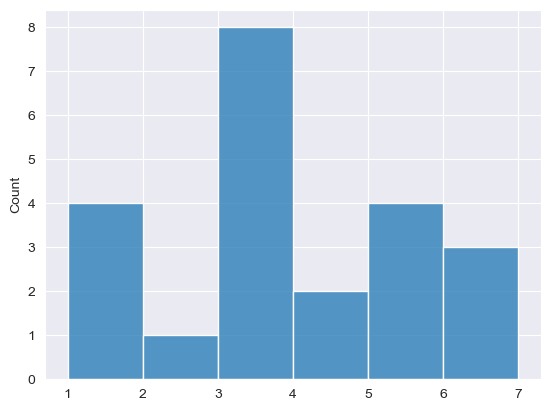

In [2]:
sample = np.array([3, 4, 5, 1, 2, 3, 4, 5, 6, 3, 3, 3, 5, 6, 7, 1, 1, 1, 3, 3, 3, 5])
sns.histplot(sample)

Le 3 a une forte densité.

## **Que dit la KDE ?**

C:\temp\ipykernel_35600\3812105265.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(sample, bw=0.1)


<Axes: ylabel='Density'>

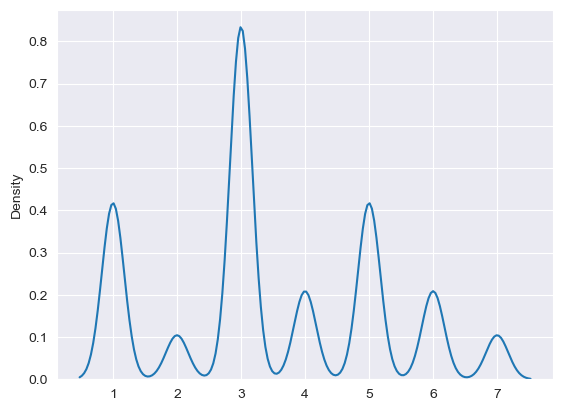

In [3]:
sample = np.array([3, 4, 5, 1, 2, 3, 4, 5, 6, 3, 3, 3, 5, 6, 7, 1, 1, 1, 3, 3, 3, 5])
sns.kdeplot(sample, bw=0.1)

Le paramètre bw_method est nommée largeur de bande. En l'augmentant ; les courbes sont ples lisses.

'`mpg`' est l’abréviation de mileage per gallon (kilométrage par gallon).

## **Importer la dataset 'mpg'**

In [4]:
car = sns.load_dataset('mpg')
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
# Combien y a-t-il de valeurs ?
car.cylinders.nunique()

5

In [6]:
# Quelles sont les valeurs ?
car.cylinders.unique()

array([8, 4, 6, 3, 5])

<Axes: xlabel='cylinders', ylabel='Count'>

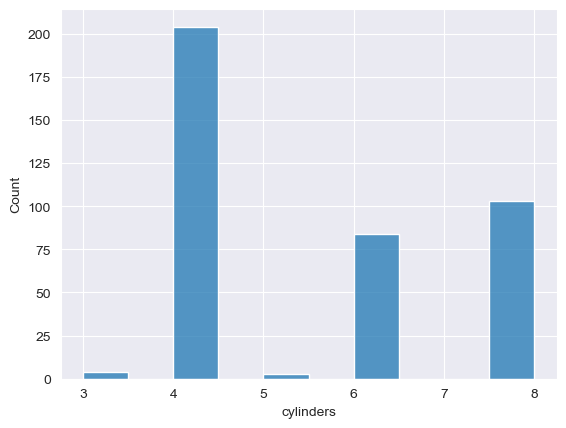

In [7]:
# Combien decylindres ont la majorité des voitures ?
sns.histplot(car.cylinders)

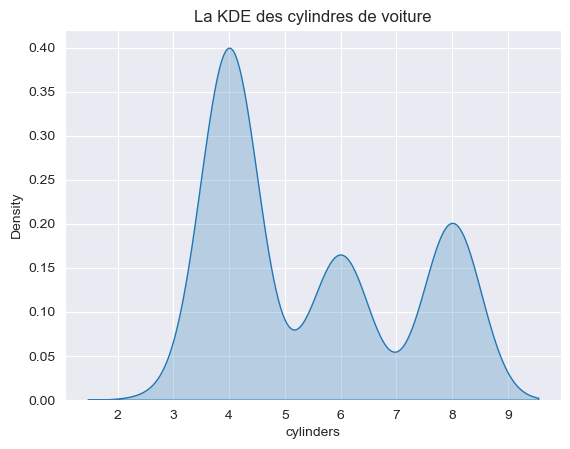

In [8]:
sns.kdeplot(car.cylinders, fill=True)        # fill rempli sous la courbe
plt.title('La KDE des cylindres de voiture');

## **Y a-til des valeurs manquantes ?**

In [9]:
car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
# Supprimer les valeurs manquantes à 'horsepower'
car = car.dropna()

<Axes: xlabel='horsepower', ylabel='Density'>

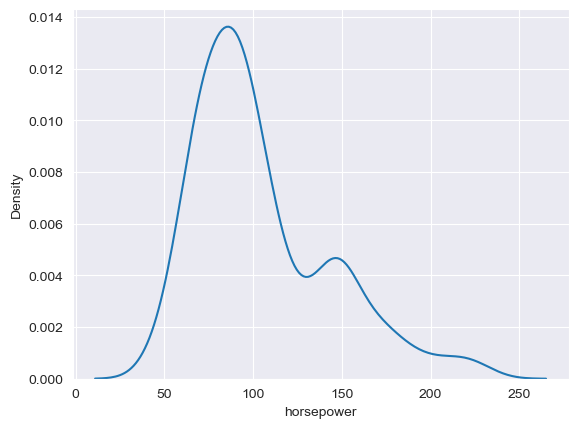

In [11]:
# Tracer la KDE d'horsepower
sns.kdeplot(car.horsepower)

### Augmenter la précision en augmentant la bande passante

<Axes: xlabel='horsepower', ylabel='Density'>

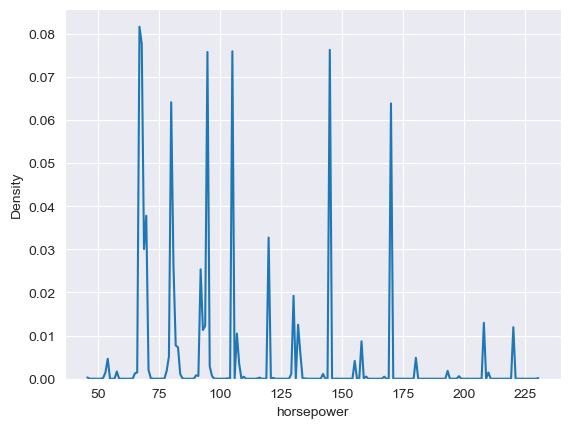

In [12]:
sns.kdeplot(car.horsepower, bw_method=0.002)

Après la KDE univariée. Faire la KDE bivariée.

<Axes: xlabel='mpg', ylabel='horsepower'>

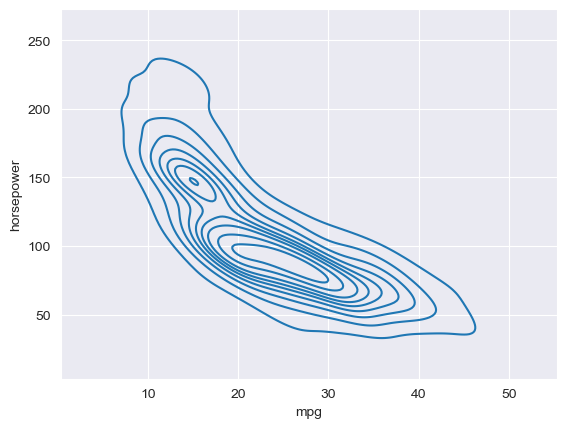

In [13]:
sns.kdeplot(data=car, x=car.mpg, y=car.horsepower)

La densité est dans les 2 colonnes.

Text(0.5, 0, 'density')

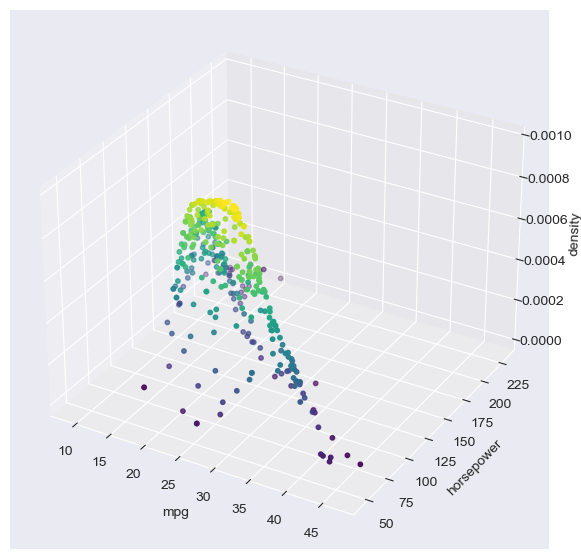

In [14]:
# Nuage en 3D
x = car['mpg']
y = car['horsepower']

# Calcul de la KDE
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Tracé 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=z, cmap='viridis', s=10)
ax.set_xlabel('mpg')
ax.set_ylabel('horsepower')
ax.set_zlabel('density')

Text(0.5, 0, 'density')

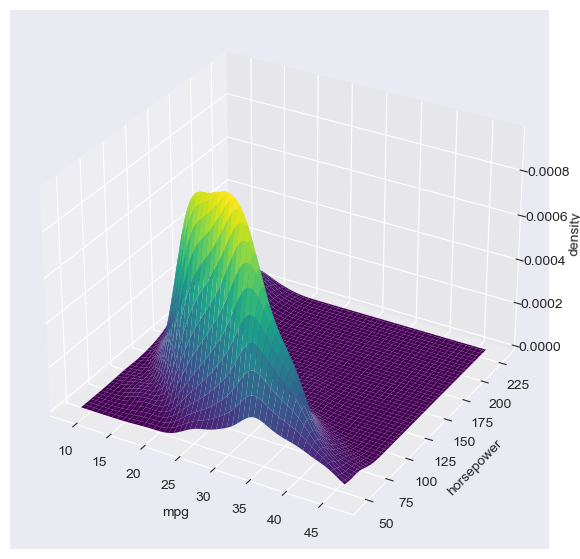

In [15]:
# 3D plein
xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
positions = np.vstack([xi.ravel(), yi.ravel()])
zi = np.reshape(gaussian_kde(xy)(positions), xi.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis', linewidth=0)
ax.set_xlabel('mpg')
ax.set_ylabel('horsepower')
ax.set_zlabel('density')

### Quelle est la densité des voitures ayant plus de puissance et de kilométrage en fonction du nombre de cylindres ?

<Axes: xlabel='mpg', ylabel='horsepower'>

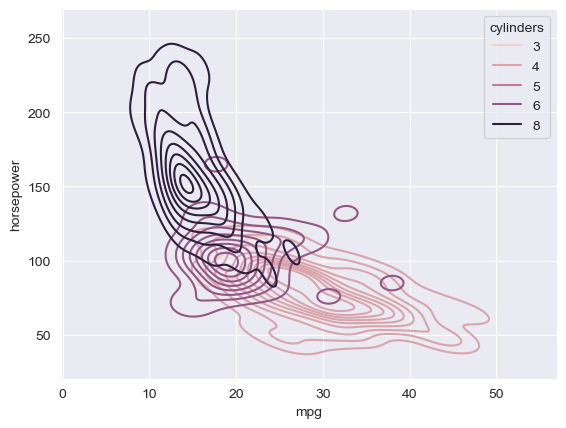

In [16]:
sns.kdeplot(data=car, x=car.mpg, y=car.horsepower, hue=car.cylinders)

Celon les spaghettis très clairs, les voitures à 8 cylindres consomment moins et sont plus puissante.

<Axes: xlabel='mpg', ylabel='horsepower'>

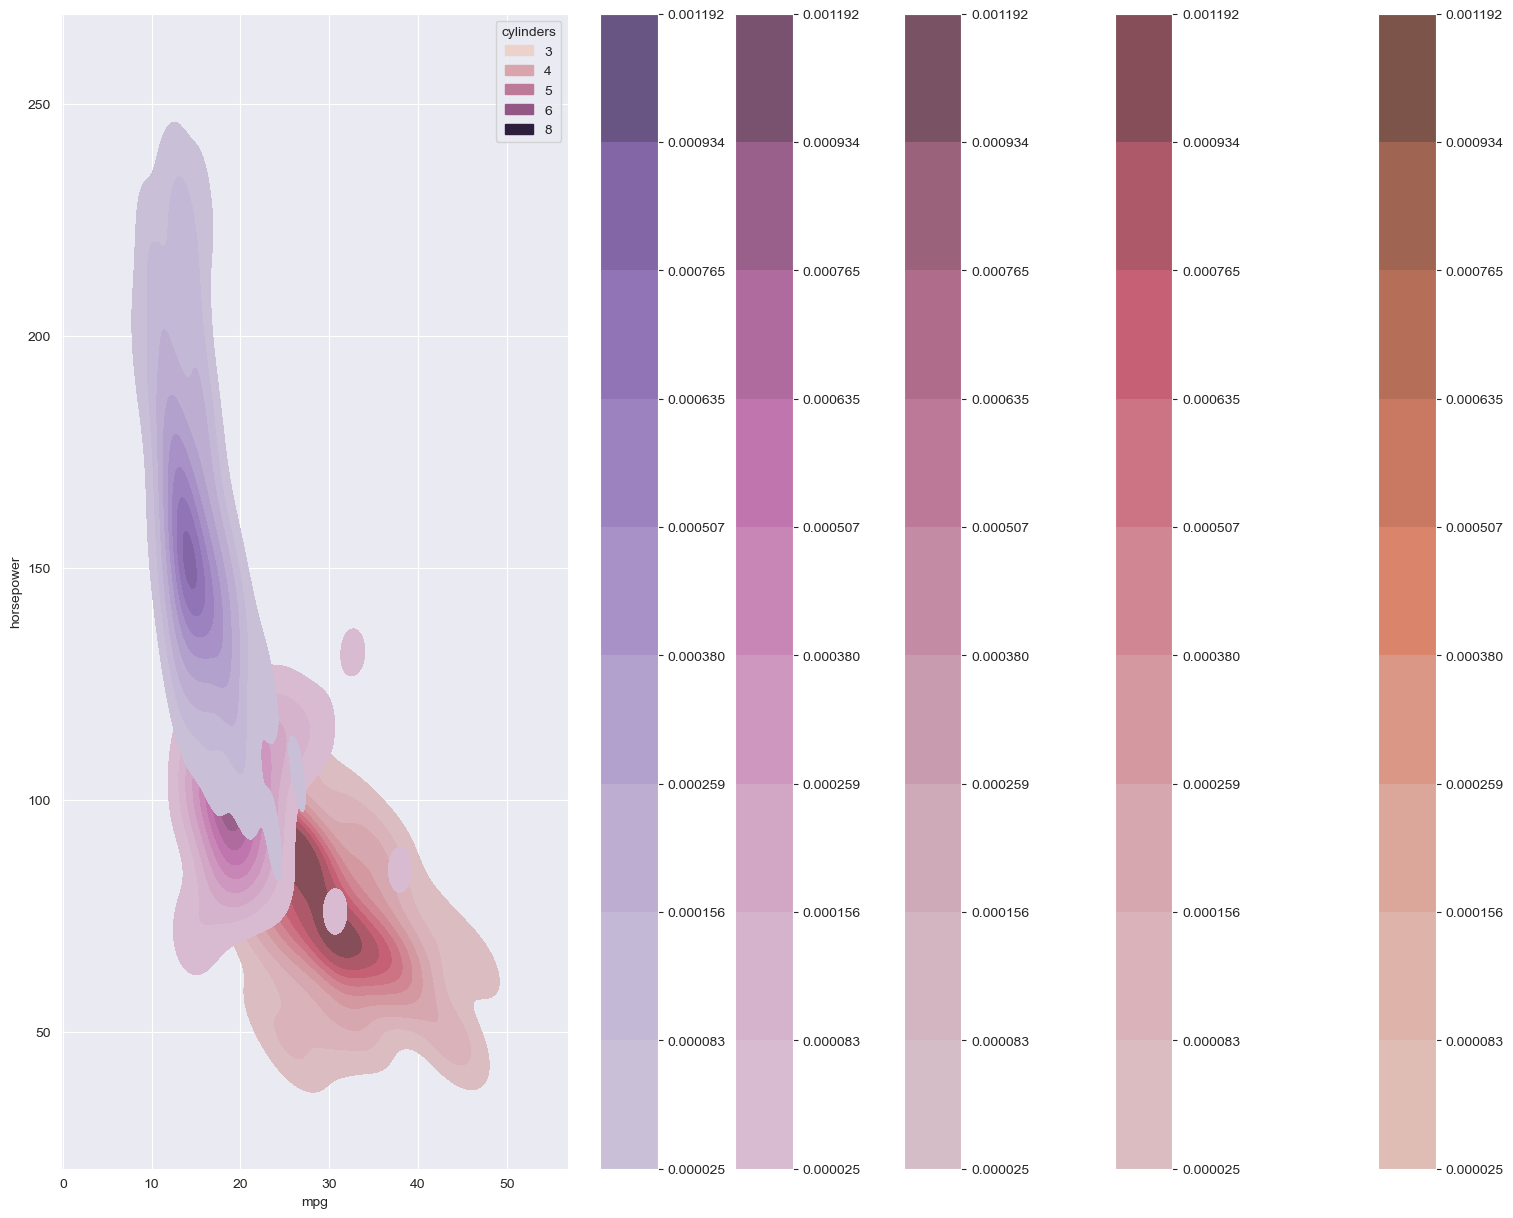

In [17]:
plt.figure(figsize=(20, 15))
sns.kdeplot(data=car, x=car.mpg, y=car.horsepower, hue=car.cylinders, fill=True, cbar=True)

Plus les couleurs sont claires, plus la densité est fortes.